In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

plt.style.use('ggplot')

import nltk

In [2]:
df = pd.read_csv(r"C:\Users\MORE SIR\Desktop\NLP\dataset\Reviews.csv")

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df['Text'].head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

In [5]:
df.shape

(568454, 10)

# QuickEDA

In [6]:
df= df.head(600)

<Axes: title={'center': 'count of reviews by stars'}, xlabel='Score'>

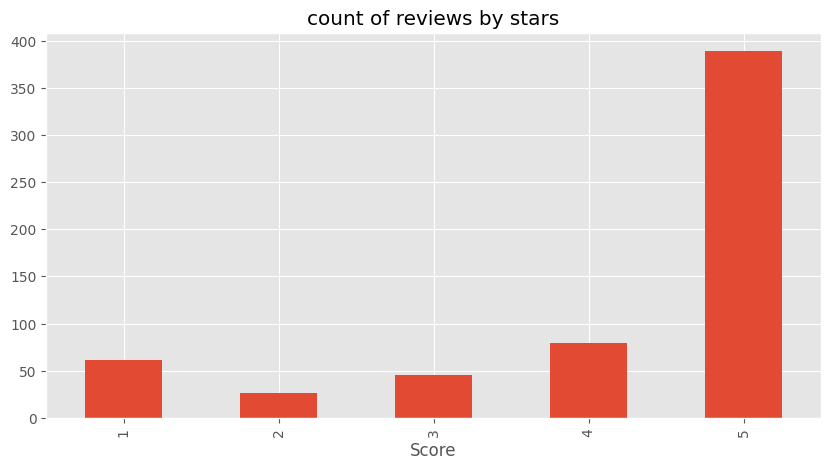

In [7]:
df["Score"].value_counts().sort_index().plot(kind = "bar", title = 'count of reviews by stars', figsize =(10,5))

# Basic NLTK

In [8]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\MORE
[nltk_data]     SIR\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
example = df['Text'][50]
tokens = nltk.word_tokenize(example)
tokens

['This',
 'oatmeal',
 'is',
 'not',
 'good',
 '.',
 'Its',
 'mushy',
 ',',
 'soft',
 ',',
 'I',
 'do',
 "n't",
 'like',
 'it',
 '.',
 'Quaker',
 'Oats',
 'is',
 'the',
 'way',
 'to',
 'go',
 '.']

In [10]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\MORE SIR\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [11]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [12]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to C:\Users\MORE
[nltk_data]     SIR\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [13]:
nltk.download('words')

[nltk_data] Downloading package words to C:\Users\MORE
[nltk_data]     SIR\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [14]:
entitles = nltk.chunk.ne_chunk(tagged)
entitles.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


# VADAR Sentiment Scoring 

In [15]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\MORE
[nltk_data]     SIR\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [16]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

In [17]:
sia.polarity_scores("this is very bad")

{'neg': 0.558, 'neu': 0.442, 'pos': 0.0, 'compound': -0.5849}

In [18]:
# now lets get the polarity score for entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/600 [00:00<?, ?it/s]

In [19]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns = {'index': 'Id'})
vaders = vaders.merge(df, how ='left')

In [20]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


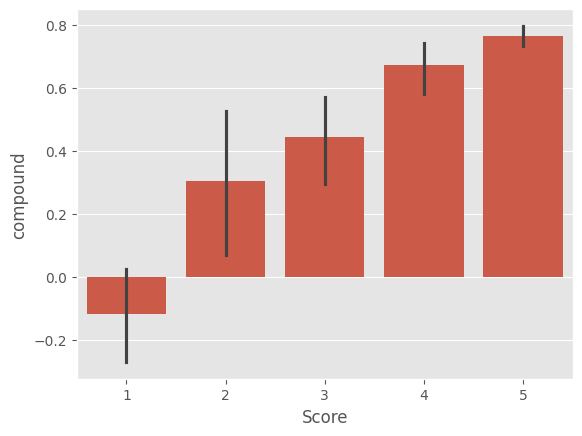

In [21]:
sns.barplot(data = vaders, x = 'Score', y = 'compound')
plt.show()

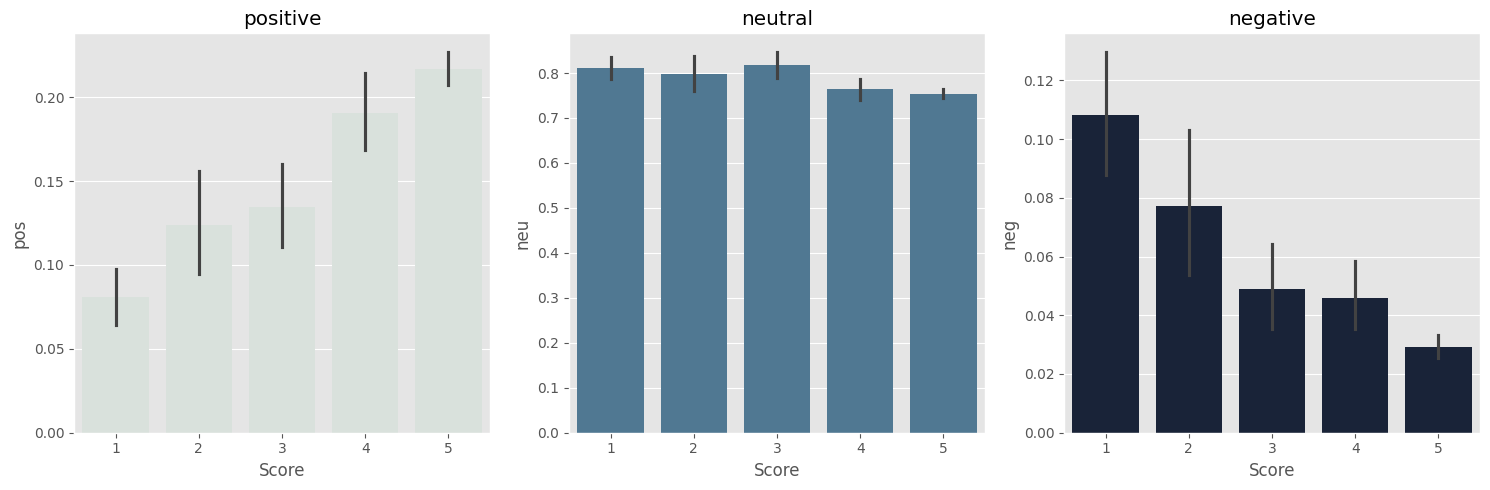

In [22]:
fig, axs = plt.subplots(1, 3, figsize = (15,5))
sns.barplot(data = vaders, x = 'Score', y ='pos', ax= axs[0], color='#d8e2dc')
sns.barplot(data = vaders, x = 'Score', y ='neu', ax= axs[1], color='#457b9d')
sns.barplot(data = vaders, x = 'Score', y ='neg', ax= axs[2], color='#14213d')
axs[0].set_title("positive")
axs[1].set_title("neutral")
axs[2].set_title("negative")
plt.tight_layout()
plt.show()

In [31]:
from transformers import RobertaTokenizer 
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [33]:
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

C:\Users\MORE SIR\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

C:\Users\MORE SIR\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\MORE SIR\.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [28]:
import torch

In [34]:
# run on roberta model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output.logits.detach().numpy()
scores = softmax(scores[0])
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687453, 'roberta_pos': 0.0029573692}


In [35]:
def polarity_scores_roberta(example):
    encoder_text = tokenizer(example, return_tensors='pt')
    output = model(**encoder_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [47]:
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename ={}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {** vader_result, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f"broke in there{myid}")

  0%|          | 0/600 [00:00<?, ?it/s]

broke in there83
broke in there187
broke in there529
broke in there540


In [48]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns = {'index': 'Id'})
results_df = results_df.merge(df, how ='left')

In [49]:
results_df.columns

Index(['Id', 'neg', 'neu', 'pos', 'compound', 'roberta_neg', 'roberta_neu',
       'roberta_pos', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'Summary', 'Text'],
      dtype='object')

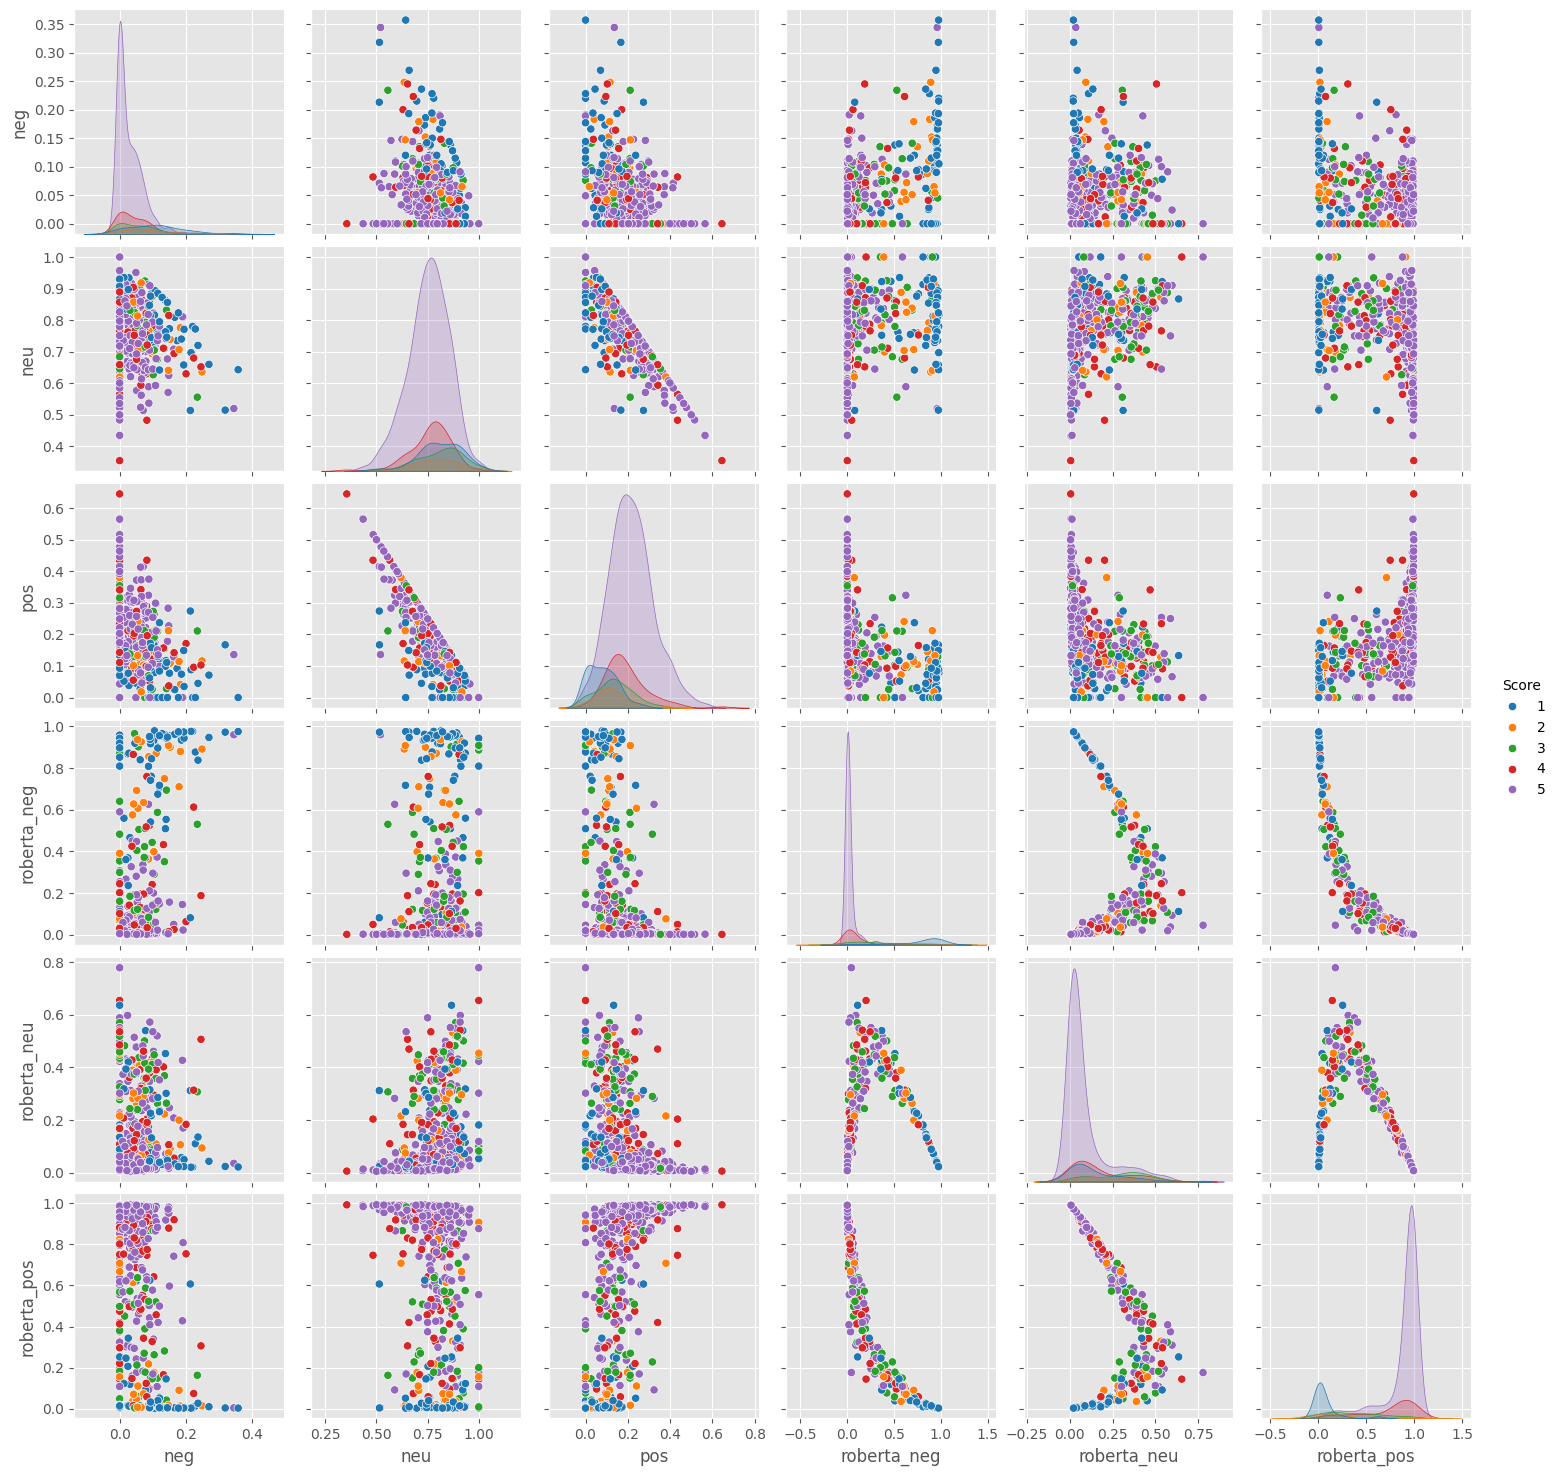

In [50]:
sns.pairplot(data = results_df,
            vars= ['neg', 'neu', 'pos',
                  'roberta_neg', 'roberta_neu','roberta_pos'],
            hue = 'Score',
            palette = 'tab10')
plt.show()

## positive sentiment but negative reviews

In [51]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending= False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [52]:
results_df.query('Score == 1') \
    .sort_values('pos', ascending= False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

### negative sentiment but positive reviews

In [53]:
results_df.query('Score == 5') \
    .sort_values('roberta_pos', ascending= False)['Text'].values[0]

"These are my favorite bars ever. The combo of raisons and dark choc is wonderful! Very filling! These are hard to find in the stores. I'm thankful for subsrcibe and save!"

In [54]:
results_df.query('Score == 5') \
    .sort_values('pos', ascending= False)['Text'].values[0]

'This is an great product. The taste is great, and it works exactly as described. Superb natural sleep aid. AMAZING!'

In [1]:
import pickle
path = "Desktop/NLP/Amazon_Sentiment.ipynb"

with open("model.pkl", "wb")as file:

    pickle.dump(path, file)

print("file is successfully pickled")

file is successfully pickled
